# Chapter 10
# Unsupervised Learning
A set of statistical tools intended for the settings in which we have only a set of features $X_1, X_2,....,X_p$ measured on n observations.

Our goal is not prediction but finding interesting things about the measurements on $X_1, X_2,....,X_p$. 
1. __PCA__ :- PCA is used for data visualization or data pre processing before supervised techniques are applied.
2. __Clustering__ :- Broad class of methods for discovering unknown subgroups of data.

## Principal Component Analysis
PCA allows us to summarize data with a smaller number of representative variables that collectively explain most of the variability in the original set. We are finding the directions in feature space along which the original data are highly variable.

* PCA refers to the process by which principal components are computed, and the subsequent use of these components in understanding the data.

__What are Principal Components?__

To visualize a dataset with n > 2 dimension is not possible. We wants to find a low-dimensional representation of the data that captures as much information as possible.

The idea is that each of the observation of size n lives in p-dimensional space but not all dimensions are equally important. Each dimension found by PCA is a linear combination of the p features.

First principal component is the normalized linear combination of the features
$$Z_1 = \phi_{11}X_1 + \phi_{21}X_2 +......+ \phi_{p1}X_p$$ that has the largest variance. By normalized, we mean $\sum_{j = 1}^{p}\phi_{j1}^2 = 1$.

$\phi's$ are called loadings for the first principal component. Together, the loadings make up the principal component loading vector, $\phi_1 = (\phi_{11},\phi_{21},....,\phi_{p1})^T$. We constraints the loading, so that their sum of squares is equal to one. Since otherwise setting these elements to a large absolute value will result in high variance. 

First Component solves the optimization problem $$maximize_{\phi_{11},\phi_{21},....,\phi_{p1}}{\frac{1}{n}\sum_{i=1}^n(\sum_{j=1}^p\phi_{j1}x_{ij})^2}$$ subject to $\sum_{j = 1}^{p}\phi_{j1}^2 = 1$.

Since $\frac{1}{n}\sum x_{ij} = 0$ (normalized), the average of the $z_{11},z_{21},....,z_{n1}$ will be zero as well. Hence, the objective we are maximizing is just the sample variance of the n values of $z_{i1}$. 

$z_{11},z_{21},....,z_{n1}$ are score of first principal component.The optimization problem is solved via an eigen decomposition.

* After the first principal component $Z_1$ of the feature has been determined, we can find second principal component $Z_2$. $Z_2$ is a linear combination of $X_1, X_2,....,X_p$ that has miximal variance out of all linear combination that are uncorrelated with $Z_1$.
$$Z_{i2} = \phi_{12}X_{i1} + \phi_{22}X_{i2} +......+ \phi_{p2}X_{ip}$$
$\phi_2$ = Second principal component loading vector. $\phi_2 = (\phi_{12},\phi_{22},....,\phi_{p2})^T$ and $\phi_1$ and $\phi_2$ are orthogonal vectors.

Find $\phi_2$ is the same optimization problem as $\phi_1$ with additional constraints that $\phi_2$ is orthogonal to $\phi_1$. We can use these pricipal components to produce low-dimensional views of the data. 

In [47]:
import numpy as np
import pandas as pd
from pca import pca 
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics.pairwise import pairwise_distances

In [27]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/USArrests.csv"
Arrests = pd.read_csv(url, index_col = 0)
X = scale(np.array(Arrests))

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


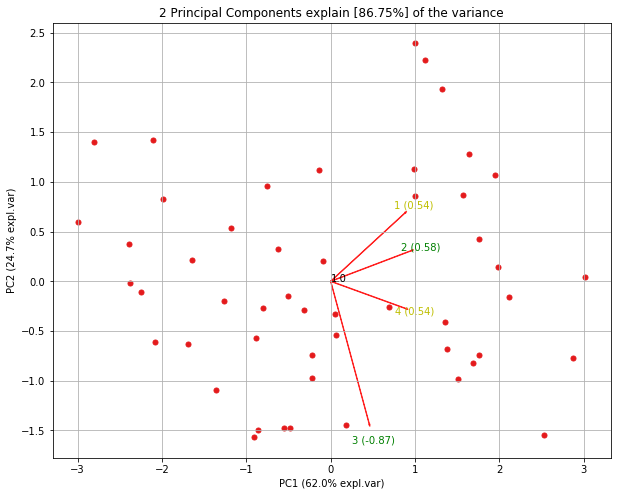

In [28]:
pca2comp = pca(n_components = 2)
results = pca2comp.fit_transform(X)
fig, ax = pca2comp.biplot(n_feat=4, legend = False)
plt.show()

The 4 variables in above plots are "Murder", "Assault", "UrbanPop", "Rape". In above plot, loading for "Rape" in first principal component is 0.54. Also, we can see that "UrbanPop" have a small loading in first pricipal component but a high loading in second principal component. The above plot is called a __biplot__

#### Another Interpretation of Principal Components
Principal components provide low-dimensional linear surfaces that are closest to the observations.
* First principal component loading vector is the line in p-dimensional space that is closest to the n observations. The notion of principal components as the dimensions that are closest to the n observations extends beyond just the first principal component.

* Together first M principal component score vectors and the first M principal component loading vector provide the best M - dimensional approximation to the ith observation $x_{ij}$. We can write that as $$x_{ij} \approx \sum_{m = 1}^M z_{im} \phi_{jm}$$.
* When M = p, representation is exact and as M decrease, represenatation becomes blurry.

### More on PCA
__Scaling the variables :-__

Variables should be centered. Results obtained will depend on weather the variables have been individually scaled. If scaling is not performed, the variable that have high variance will result in very large loading for those variables and the variables with high loading will have highest weight.


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


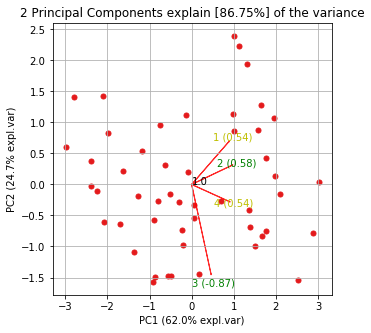

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


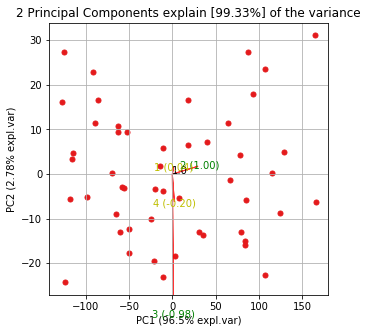

In [45]:
X = scale(np.array(Arrests))
pca2comp = pca(n_components = 2)
results = pca2comp.fit_transform(X)
ax1 = pca2comp.biplot(n_feat=4, legend = False, figsize = (5,5))
X = np.array(Arrests)
pca2comp = pca(n_components = 2)
results = pca2comp.fit_transform(X)
ax2 = pca2comp.biplot(n_feat=4, legend = False, figsize = (5,5))

The above 2 plots shows the effect of scaling the variables. The first plot is PCA with scaled variables and second plot is PCA with original variables.The second plot shows that the highest loading is assigned to "Assault" variable only because it has a large scale. The other variables do not have a high loading but in the after scaling the variables in first plot we can see that 3 variables have similar loading in first principal component.

__Uniqueness of Principal Components :-__

Each principal component loading vector and score vectors are unique upto sign flip. Flipping of sign has no effect as the directions does not change.

__The proportion of variance explained :-__

We also like to know how much of the information in a given dataset is lost. How much of the variance is not contained in the first few principal components?

__Proportion of variance Explained (PVE) by each Principal component__

Total variance present in a dataset $$\sum_{j = 1}^p Var(X_j) = \sum_{j = 1}^p \frac{1}{n} \sum_{i = 1}^nx_{ij}^2$$
and the variance explained by the mth principal component $$\frac{1}{n}\sum_{i=1}^n z_{im}^2 = \frac{1}{n}\sum_{i=1}^n (\sum_{j = 1}^p \phi_{jm} x_{ij})^2$$
PVE of the mth principal component $$\frac{\sum_{i=1}^n (\sum_{j = 1}^p \phi_{jm} x_{ij})^2}{\sum_{j = 1}^p\sum_{i = 1}^nx_{ij}^2}$$

To get the PVE for the first M principal component, we can simply sum over each of the first M PVE. In total, we have min(n-1,p) principal components and their PVEs sum to one.

__Deciding How many Principal Components to use :-__
We would like to use smallest number of Principal component required. One way to do it is to plot PVEs for different no. of principal component and then looking for a point at which the proportion of variance explained by each of the subsequent principal component drops off.

* If first few principal component do not show any interesting pattern, then further principal component are unlikely to be of interest and the inverse is also true. 

* In supervised analysis, we can decide on no. of components based on which one results in minimum error.
* Use of principal component (M < p) rather than the original p variables will also result in less noisy data (data set is concentrated in its first few principal components).

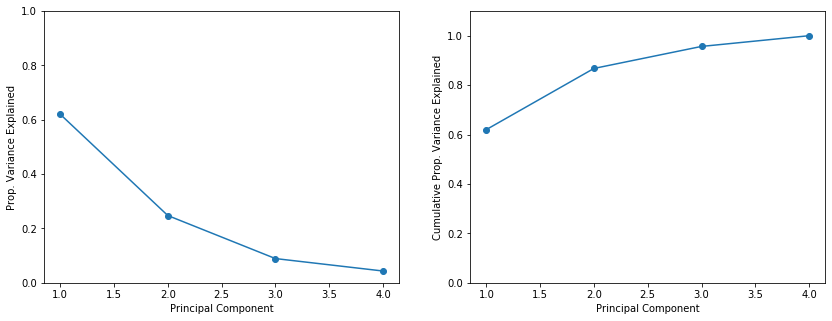

In [64]:
X = scale(np.array(Arrests))
pca4comp = PCA(n_components = 4).fit(X)
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (14,5))
ax1.plot(list(range(1,5)),pca4comp.explained_variance_ratio_, marker = "o")
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Prop. Variance Explained')
ax1.set_ylim(0,1)

ax2.plot(list(range(1,5)),pca4comp.explained_variance_ratio_.cumsum(), marker = "o")
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Cumulative Prop. Variance Explained')
ax2.set_ylim(0,1.1)

plt.show()

## Clustering Methods
Clustering refers to a set of techniques for finding subgroups, or clusters, in a dataset. Observations within each group are quite different from each other (we must define what it means for two or more observations to be similar or different). Both clustering and PCA seek to simplify the data via a small number of summaries but their mechanisms are different.

* PCA looks to find a low-dimensional representation of the observations that explain a good fraction of the variance.
* Clustering look to find homogeneous subgroups among the observations.

2 approaches of clustering:-
1. K-means clustering.
2. Hierarchial clustering.

In general, we can cluster observations on the basis of the features in order to identify subgroups among the observations, or we can cluster features on the basis of the observations in order to discover subgroups among the features.

### K-Means Clustering
It is a simple approach for partioning a dataset into K distinct non-overlapping clusters. We need to specify K before applying the algorithm. Let $C_1, C_2,...., C_k$ denotes sets containing the indices of the observations in each cluster. These satisfy 2 properties. 
1. $C_1 \cup C_2\ \cup....\cup\ C_k$ = {1,2,...,n}. In other words, each observations belongs to atleast one of the K clusters.
2. $C_1 \cap C_2\ \cap....\cap\ C_k$ for all K = $k^{'}$. The clusters are non-overlapping : no observation belongs to more than one cluster.

Idea is that a good clustering is one for which within - cluster variation is as small as possible. ($W(C_k)$, a amount by which the observations within a cluster differ from each other). Hence we want to solve the problem
$$minimize_{C_1,...,C_k}(\sum_{k=1}^K W(C_k))$$
We can define within-cluster varaition as squared Euclidean distance.
$$W(C_k) = \frac{1}{|C_k|}\sum_{i,i^{'} \epsilon C_k} \sum_{j=1}^p(x_{ij} - x_{i^{'}j})^2$$
where |$C_k$| denotes the no. of observations in the Kth cluster.

__Algorithm__:-

1. Randomly assign a number, from 1 to K to each of the observations. These serve as initial cluster assignments for the observations.
2. Iterate until the cluster assignments stop changing:

    (a). For each of the K clusters, compute the cluster centroid. The Kth cluster centroid is the vector of the p feature means for the observations in the Kth cluster. 
    
    (b). Assign each observation to the cluster whose centriod is closest.
    
This algorithm will minimize $$\frac{1}{|C_K|}\sum_{i,i^{'} \epsilon C_k} \sum_{j=1}^p (x_{ij} - x_{i^{'}j})^2 = 2 \sum_{i \epsilon C_k} \sum_{j=1}^p (x_{ij} - x_{i^{'}j})^2$$
where $\bar x_{kj} = \frac{1}{|C_K|}\sum_{i \epsilon C_k} x_{ij}$ is the mean for features j in cluster $C_k.$

* K-means algo finds a local optimum rather than global optimum. For this reason,  we need to run the algorithm multiple times from different random intial configurations and then select the best solutions.

### Hierarchial Clustering
This is an alternative approach that does not require us to pre-specify the no. of clusters. It also results in an attractive tree based represenation of the observations called a __dendrogram__.

Most common type of clustering is called bottom-up and agglomerative clustering due to the fact that a dendrogram is built starting from the leaves and combining clusters up to trunk.

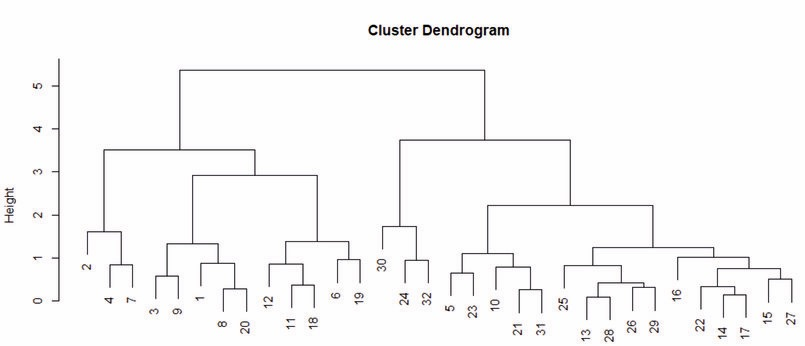

In [1]:
from IPython.display import Image
Image(filename = "/Users/atyagi/Desktop/ISLR Python Repo/ISLR_Notes_codes/Dendrogram.jpg")

* Each leaf of the dendrogram represents one of n observations.
* As we move up to the tree, some leaves begins to fuse into branches. These corresponds to observations that are similar to each other.
* As we move higher, branches themselves fuse into other branches or leaves. The earlier the fusion occurs, the more similar the group of observations are to each other. The observations that fuse later can be quite different.
* The height of the fusion, as measured on the vertical axis, indicates how different the 2 observations are, larger the length, more different are the observations.
* We cannot draw conclusion based on the proximity along the horizontal axis. This is because, there are $2^{n-1}$ possible reordering of the dendrogram where n is no. of leaves. At each (n-1) points where fusion occur, the position of two fused branches can be swaped without affecting the meaning of the dendrogram.

In order to identify, no. of clusters we make a horizontal cut across the dendrogram. The distinct set of observations beneath the cut can be interpreted as cluster. We can create any no. of clusters as we want. One single dendrogram can be used to obtain any number of clusters.

Hierarchial structure can be very unrealistic on few datasets and result in worse clusters than K-means clustering.

__Algorithms__ :-

1. Begin with n observations and a dissimilarity measure (such as Euclidean distance) of all the nC2 = n(n-1)/2 pairwise dissimilarities. Treat each observation as its own cluster.
2. For i = n, n-1,....2.

    (a). Examine all pairwise inter-cluster dissimilarities among the i clusters and identify the pair of clusters that are least dissimilar (that is, most similar). Fuse these two clusters. The dissimilarity between these two clusters indicates the height in the dendrogram of which the fusion should be placed.
    
    (b). Compute the new pairwise inter-cluster dissimilarities among the i-1 remaining clusters.
    
The algo proceeds until all the observations belong to one single cluster and the dendrogram is complete.

__Linkage__ :- To define dissimilrity between 2 clusters if one or both have multiple observations, we use linkage.

__Types of Linkage__ :-
1. __Complete__ :- Compute all pairwise dissimilarity between the observations in cluster A and cluster B, and record the lasgest these dissimilarities.
2. __Single__ :- In single, we record the smallest of these dissimilarities. This can result in extended, trailing clusters in which single observations are fused one at a time.
3. __Average__ :- Record the average of all the dissimilarities.
4. __Centroid__ :- Dissimilarity between centroid for cluster A and centroid of cluster B.

Average and complete are usually preferred. Dendrograms strongly depends on what type of linkage is used.

__Choice of dissimilarity Measure__ :-
Another useful choice for dissimilarity measure is correlation based distance. It consider two observations to be similar if their features are highly correlated even though the observed value may be far apart in terms of Euclidean distance.

* It focuses on shape of observation profiles rather than their magnitudes (In case of marketing data, the customers who have made less purchase tends to group together if we can use Euclidean distance, but in this case correlation based measure might make more sense as we are trying to group similar purchase behaviour).
* We also wants to scale variables as well otherwise the choice of units for a particular variable will greatly affect the dissimilarity measure ontained.

### Practical Issues :-
__Small decisions with Big consequences__:-
* Should the observations or features first be standardized in some way?
* In case of hierarchial clustering.
    * What dissimilarity measure to use?
    * What type of linkage?
    * Where to cut the dendrogram?
* In case of K-means, what will be out K?

__Validating the clusters__ :-
Are there really cluster present in data or are we just clustering the noise? We need to consider the techniques for assigning a p value to a cluster.

__Other considerations__ :-

* Outliers sometimes heavly distort the clusters. Few observations might be very different from the rest and are not supposed to belong to any cluster. But K-means and hierarchial will force them into a cluster. Mixture models can be helpful in this case(soft clusters).

Clustering can be very non-robust, we should check that by clustering a subset of data and see if the similar pattern emrge in subset as in the whole data.

## Lab 1: Principal Component Analysis
This is exactly same as what we have already done to produce the plots above. So we will skip this for now.

## Lab 2: Clustering
### K-means Clustering
We will simulate some observations.

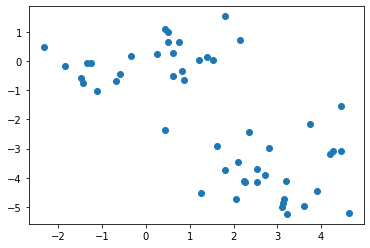

In [18]:
x = np.random.normal(0,1,(50,2))
x[:25,0] = x[:25,0] + 3
x[:25,1] = x[:25,1] - 4
plt.scatter(x[:,0],x[:,1])
plt.show()

In [28]:
Km = KMeans(n_clusters = 2, n_init = 20).fit(x)
Km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

We can see that Kmeans have correctly classified the 2 different cluster. We will now plot it.

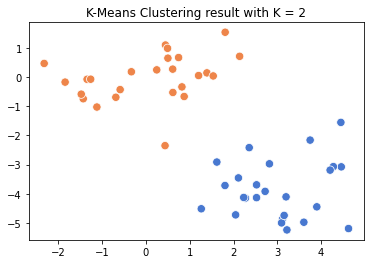

In [34]:
sns.scatterplot(x = x[:,0], y = x[:,1], hue = Km.labels_, s= 70, palette = "muted",legend = False).set_title("K-Means Clustering result with K = 2")
plt.show()

Since this is a 2 - dimensional data, we can plot it easily. For higher dimensions we can use PCA to reduce the dimensions and then plot the data.

Now in general we do not know how many clusters are present in the data. Now we will fit KMeans for K = 3.

In [35]:
Km = KMeans(n_clusters = 3, n_init = 20).fit(x)
Km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2], dtype=int32)

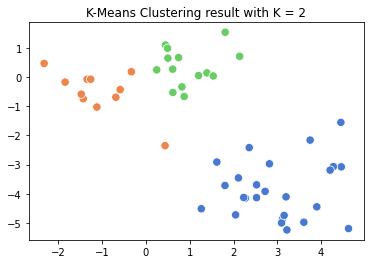

In [36]:
sns.scatterplot(x = x[:,0], y = x[:,1], hue = Km.labels_, s= 70, palette = "muted",legend = False).set_title("K-Means Clustering result with K = 2")
plt.show()

The argument n_init is used so that KMeans will try to fit the data using different intial assignments. The lowest SSE is stored in inertia. Now we will fit using K = 1 and 20.

In [38]:
Km = KMeans(n_clusters = 3, n_init = 20).fit(x)
print(Km.inertia_)
Km = KMeans(n_clusters = 3, n_init = 1).fit(x)
print(Km.inertia_)

66.50765156295145
76.91388859934396


We can see that the SSE is much smaller when we are using n_init = 20 instead of 1.

### Hierarchial Clustering

In [48]:
Hclust = AgglomerativeClustering(n_clusters= 2, linkage = "complete").fit(x)
Hclust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

We will now use different linkage and plot the dendrogram produced from each of them.

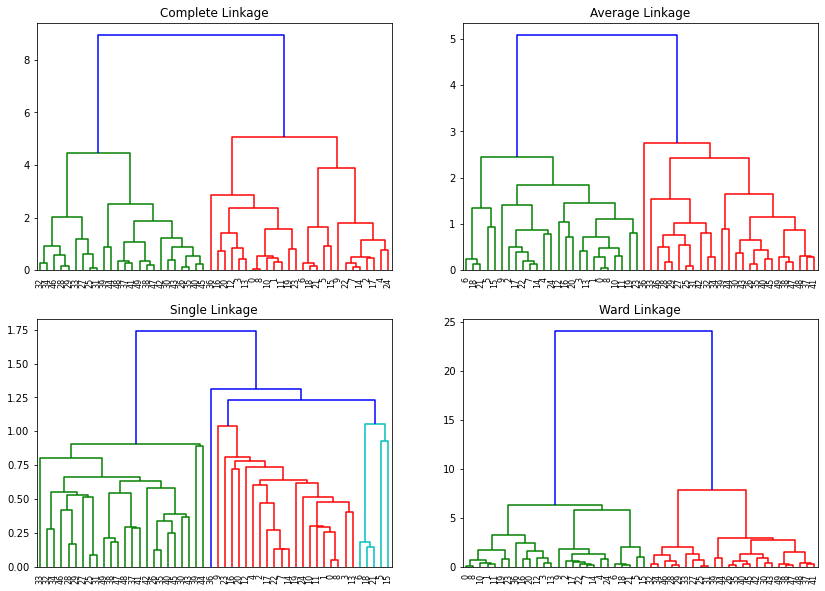

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes[0,0].set_title("Complete Linkage")
dend = shc.dendrogram(shc.linkage(x, method='complete'),ax = axes[0,0])
axes[0,1].set_title("Average Linkage")
dend = shc.dendrogram(shc.linkage(x, method='average'),ax = axes[0,1])
axes[1,0].set_title("Single Linkage")
dend = shc.dendrogram(shc.linkage(x, method='single'),ax = axes[1,0])
axes[1,1].set_title("Ward Linkage")
dend = shc.dendrogram(shc.linkage(x, method='ward'),ax = axes[1,1])

We can see that Complete and average linkage are assigning the cluster in their correct group. However single linkage has created 4 clusters. We can however force it to create 2 clusters.

In [86]:
shc.cut_tree(shc.linkage(x, method='single'), n_clusters = 2)[:,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

It is still assigning 1 observation to incorrect cluster. For correlation based distance clustering, we fist need to create a pairwise distance matrix for our data.

In [91]:
x = np.random.normal(0,1,(50,3))
dist=pairwise_distances(x)

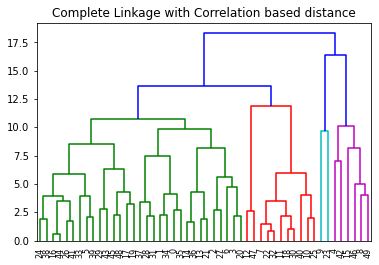

In [100]:
plt.title("Complete Linkage with Correlation based distance")
dend = shc.dendrogram(shc.linkage(1 - dist, method='complete'))

## Lab: NCI 60 Data

In [9]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/NCI60.csv"
NCI_data = pd.read_csv(url, index_col = 0)
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/NCI60_labs.csv"
NCI_lab = pd.read_csv(url, index_col = 0)
NCI_lab['x'].value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
MCF7D-repro    1
MCF7A-repro    1
K562A-repro    1
UNKNOWN        1
K562B-repro    1
Name: x, dtype: int64

### PCA on NCI 60 data

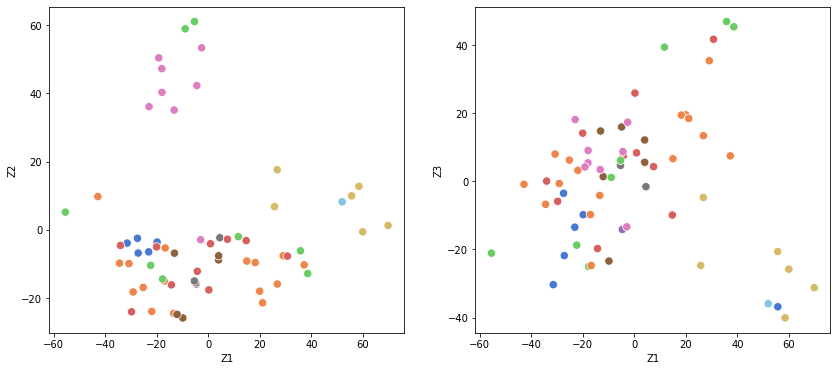

In [36]:
X = scale(np.array(NCI_data))
pca_NCI = PCA(random_state = 0)
model = pca_NCI.fit_transform(X)
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
sns.scatterplot(x = model[:,0], y = model[:,1], hue = NCI_lab['x'], s= 70, palette = "muted",legend = False, ax = ax1)
ax1.set_xlabel("Z1"); ax1.set_ylabel("Z2");
sns.scatterplot(x = model[:,0], y = model[:,2], hue = NCI_lab['x'], s= 70, palette = "muted",legend = False, ax = ax2)
ax2.set_xlabel("Z1"); ax2.set_ylabel("Z3");
plt.show()

The above plot is showing us the few first principal component. Now we will plot the PVE to get a better idea about how the algo is performing.

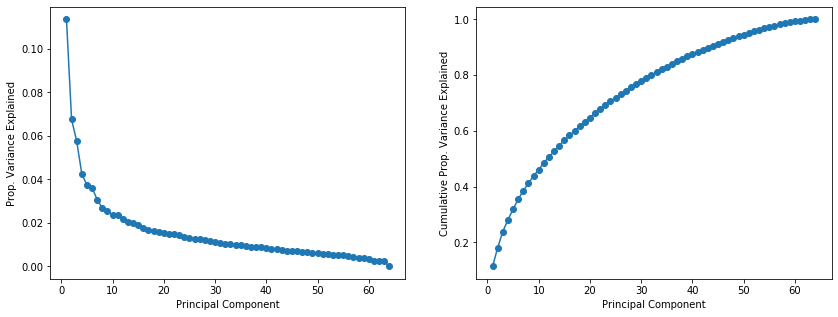

In [45]:
model = pca_NCI.fit(X)
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (14,5))
ax1.plot(list(range(1,65)),model.explained_variance_ratio_, marker = "o")
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Prop. Variance Explained')

ax2.plot(list(range(1,65)),model.explained_variance_ratio_.cumsum(), marker = "o")
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Cumulative Prop. Variance Explained')
plt.show()

We can see from the plot that first 7 PC explained 40% of the variance and after that the improvement is quite slow. So we can say that the elbow is at 7. We can also use KneeLocator to find out the optimal value.

In [51]:
kl = KneeLocator(range(1, 65), model.explained_variance_ratio_, curve="convex", direction="decreasing")
kl.elbow

8

### Clustering on NCI 60 data

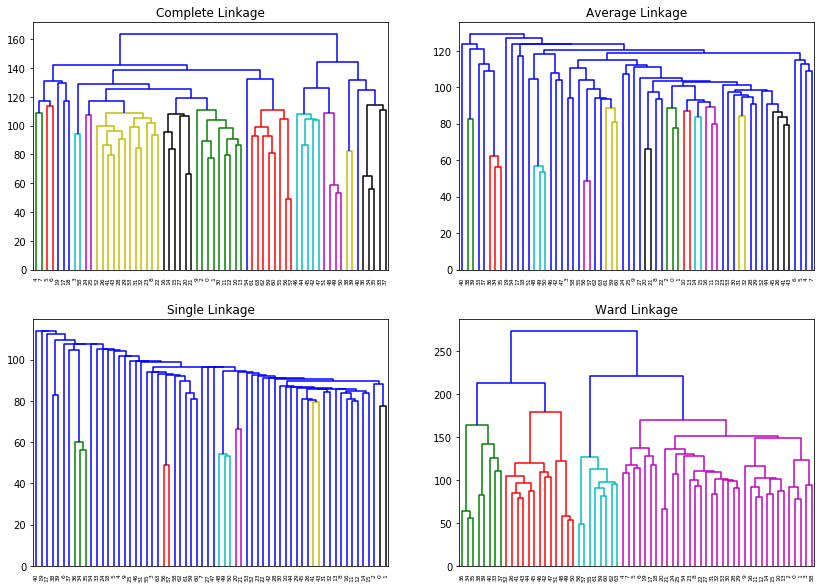

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes[0,0].set_title("Complete Linkage")
dend = shc.dendrogram(shc.linkage(X, method='complete'),ax = axes[0,0])
axes[0,1].set_title("Average Linkage")
dend = shc.dendrogram(shc.linkage(X, method='average'),ax = axes[0,1])
axes[1,0].set_title("Single Linkage")
dend = shc.dendrogram(shc.linkage(X, method='single'),ax = axes[1,0])
axes[1,1].set_title("Ward Linkage")
dend = shc.dendrogram(shc.linkage(X, method='ward'),ax = axes[1,1])

We can see that the choice of linkage highly effects the clusters created. 
* Single linkage results in bigger clusters in which the observations are added one-by-one. 
* Complete linkage results in more complete and attractive clusters. 
* Average linkage do not have as large clusters as single but it also results in more clusters than single.

We will use the complete linkage for the clusters. 

In [53]:
shc.cut_tree(shc.linkage(X, method='complete'), n_clusters = 4)[:,0]

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
data = pd.DataFrame({'Actual' : NCI_lab['x'],'Predicted': shc.cut_tree(shc.linkage(X, method='complete'), n_clusters = 4)[:,0]})
pd.crosstab(data['Actual'],data['Predicted'])

Predicted,0,1,2,3
Actual,,,,
BREAST,2,3,0,2
CNS,3,2,0,0
COLON,2,0,0,5
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


We can see that there is some pattern. All the Leukemia falls in cluster 2. And the Breast cancer is spread across 0,1 and 3 cluster. We will now plot the dendrogram with 4 clusters using complete linkage.

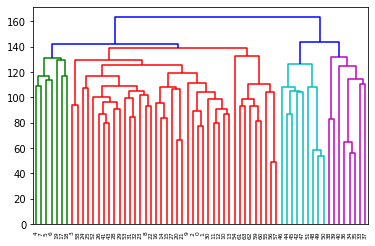

In [59]:
dend = shc.dendrogram(shc.linkage(X, method='complete'), color_threshold = 140)

We will now compare the results of hierarchial custering with K-means clustering with K = 4.

In [60]:
Km = KMeans(n_clusters = 4, n_init = 20).fit(X)
Km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [63]:
data["Predicted_kmeans"] = Km.labels_
pd.crosstab(data['Predicted_kmeans'],data['Predicted'])

Predicted,0,1,2,3
Predicted_kmeans,,,,
0,7,0,1,9
1,24,7,0,0
2,0,0,7,0
3,9,0,0,0


We can see that except cluster 2 of Kmeans and heirarchial cluster is same but the rest of the cluster are quite different from each other.

Now we can also perform clustering on the Principal Components rather than the full dataset.

In [76]:
pca_NCI = PCA(random_state = 0)
model = pca_NCI.fit_transform(X)
data["Predicted_PCA"] = shc.cut_tree(shc.linkage(model[:,list(range(1,6))], method='complete'), n_clusters = 4)[:,0]
pd.crosstab(data['Predicted_PCA'],data['Predicted'])

Predicted,0,1,2,3
Predicted_PCA,,,,
0,38,4,0,5
1,2,0,5,0
2,0,3,3,0
3,0,0,0,4


The clusters coming from Principal components are quite different from the one that are coming from the full data. But the principal components has denoised the data a bit. we can see that from the dendrogram as well.

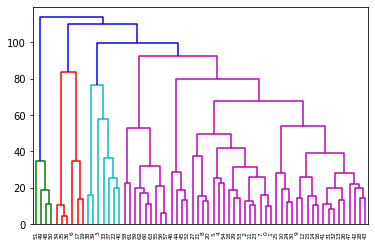

In [82]:
dend = shc.dendrogram(shc.linkage(model[:,list(range(1,6))], method='complete'), color_threshold = 95)